In [1]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm

# Append the scripts folder to the path
sys.path.insert(0, 'C:/Users/amanu/OneDrive/Desktop/week_0/')

In [2]:
from scripts.eda_helpers import read_csv_to_df, describe_df, summary_statistics, check_missing_values,check_outliers,check_incorrect_entries,calculate_correlation_matrix,create_correlation_heatmap,create_pair_plot,create_scatter_matrix,create_polar_plot,analyze_temperature_data,create_histograms,calculate_zscores,create_bubble_charts,create_time_series_plots,clean_data

In [3]:
#togo_df=read_csv_to_df('../data/togo-dapaong_qc.csv')
sierraleone_df=read_csv_to_df('../data/sierraleone-bumbuna.csv')
#benin_df=read_csv_to_df('../data/benin-malanville.csv')


In [4]:
print(sierraleone_df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [5]:
describe_df(sierraleone_df)

Shape: 525600 rows, 19 columns

Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100

In [6]:
summary_statistics(sierraleone_df)

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0

In [7]:
check_missing_values(sierraleone_df)

Missing Values:
Comments    525600
dtype: int64


In [8]:
check_outliers(sierraleone_df)


Outliers:
Column: GHI
           GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  WSgust  \
658      932.0  397.7  589.4  1002.0   978.0  26.2  85.6  1.7     2.4   
659      995.0  492.6  571.1  1065.0  1039.0  26.4  83.4  1.6     2.1   
660      988.0  504.2  552.7  1050.0  1025.0  26.5  83.6  1.5     2.4   
661      978.0  506.0  541.7  1049.0  1025.0  26.4  82.7  0.4     1.4   
662     1071.0  616.0  539.1  1142.0  1116.0  26.4  82.5  0.2     0.7   
...        ...    ...    ...     ...     ...   ...   ...  ...     ...   
524842   931.0  446.7  529.0   979.0   953.0  30.7  75.1  0.5     1.6   
524843   955.0  455.5  544.3   999.0   974.0  30.7  75.4  0.8     1.9   
524845   986.0  474.4  556.7  1035.0  1009.0  30.7  76.0  0.2     1.1   
524862   928.0  400.5  556.8   974.0   949.0  30.0  76.4  0.0     0.4   
524863   925.0  396.3  556.9   972.0   946.0  30.2  76.2  0.3     1.1   

        WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
658         0.5  121

In [9]:
check_incorrect_entries(sierraleone_df)


Incorrect Entries:
No missing values found in column: Timestamp
Column: GHI has negative values.
Column: DNI has negative values.
Column: DHI has negative values.
No negative values found in column: ModA
No negative values found in column: ModB
No negative values found in column: Tamb
No negative values found in column: RH
No negative values found in column: WS
No negative values found in column: WSgust
No negative values found in column: WSstdev
No negative values found in column: WD
No negative values found in column: WDstdev
No negative values found in column: BP
No negative values found in column: Cleaning
No negative values found in column: Precipitation
No negative values found in column: TModA
No negative values found in column: TModB
No negative values found in column: Comments


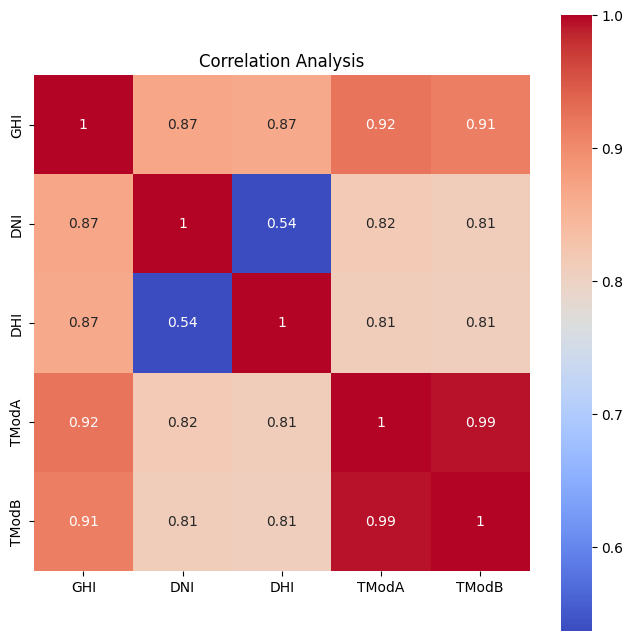

<Figure size 1000x800 with 0 Axes>

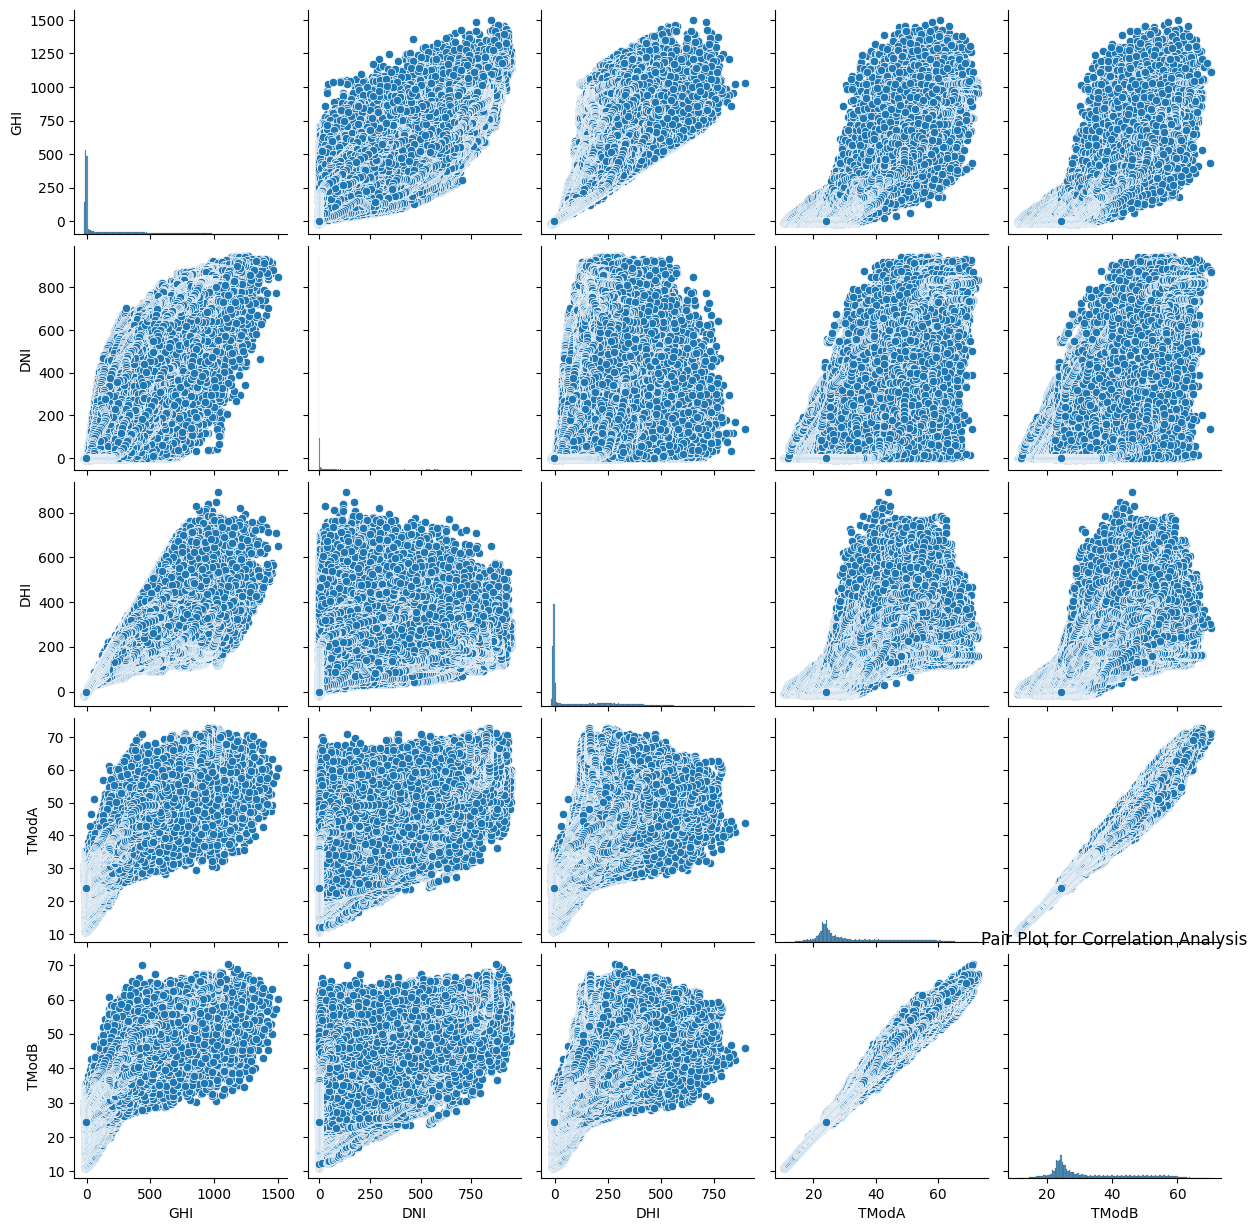

<Figure size 1000x800 with 0 Axes>

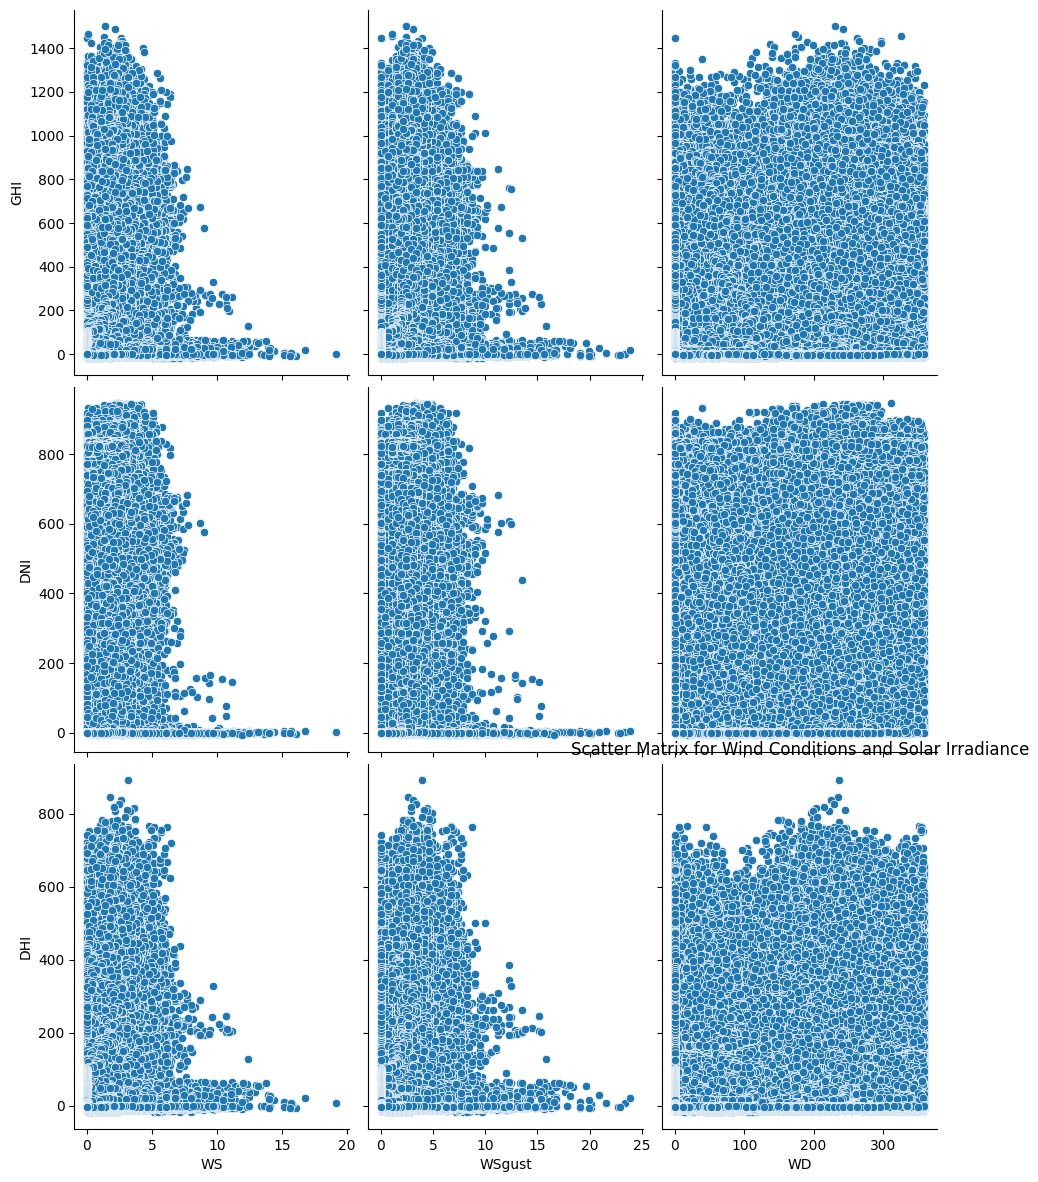

In [10]:
corr_matrix = calculate_correlation_matrix(sierraleone_df)
create_correlation_heatmap(corr_matrix)
create_pair_plot(sierraleone_df)
create_scatter_matrix(sierraleone_df)

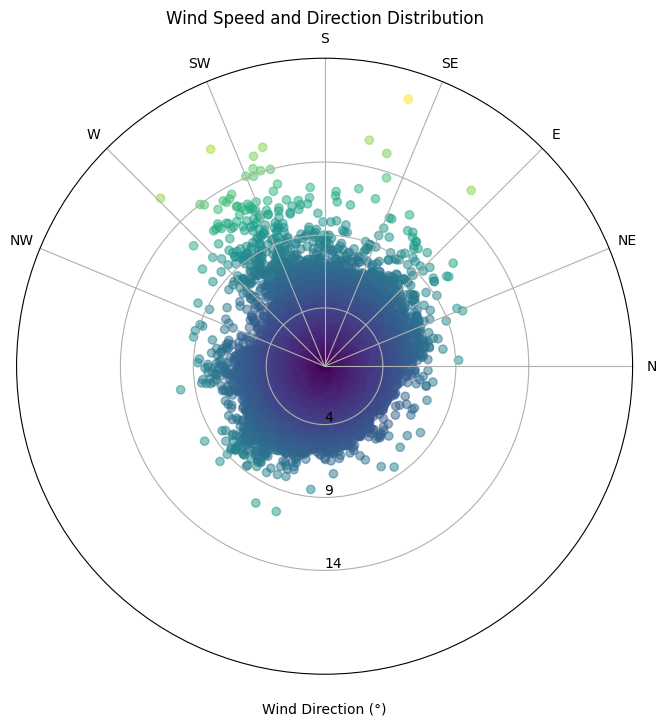

In [11]:
create_polar_plot(sierraleone_df, ws_col='WS', wd_col='WD')

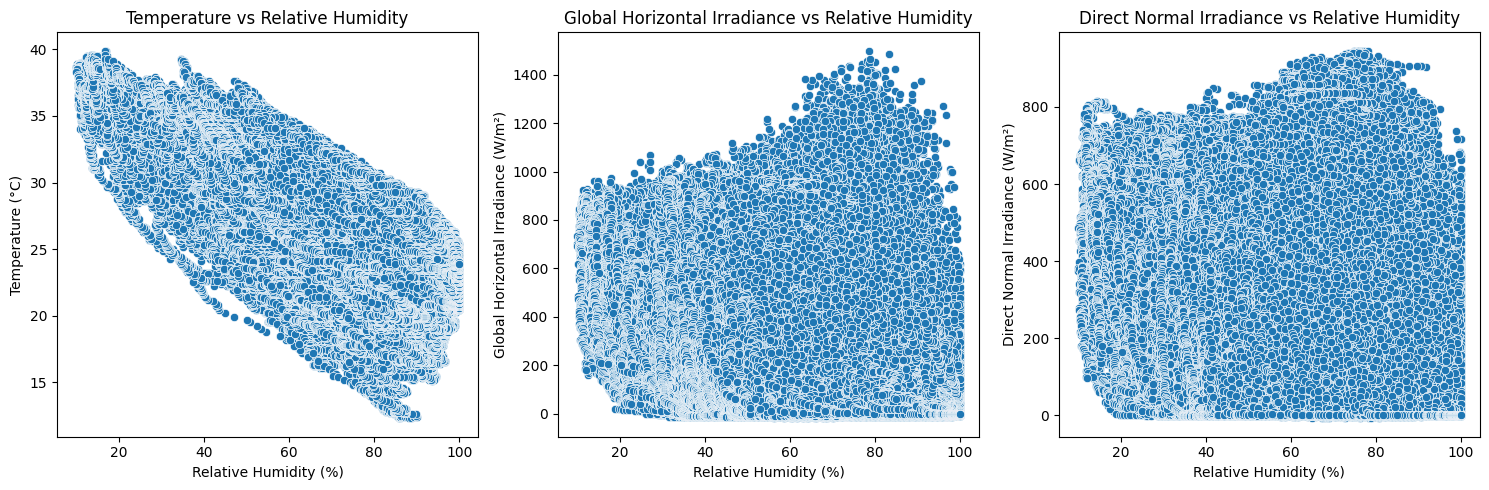

          Tamb        RH       GHI       DNI
Tamb  1.000000 -0.791937  0.641261  0.578346
RH   -0.791937  1.000000 -0.546677 -0.548800
GHI   0.641261 -0.546677  1.000000  0.869108
DNI   0.578346 -0.548800  0.869108  1.000000


In [12]:
analyze_temperature_data(sierraleone_df)

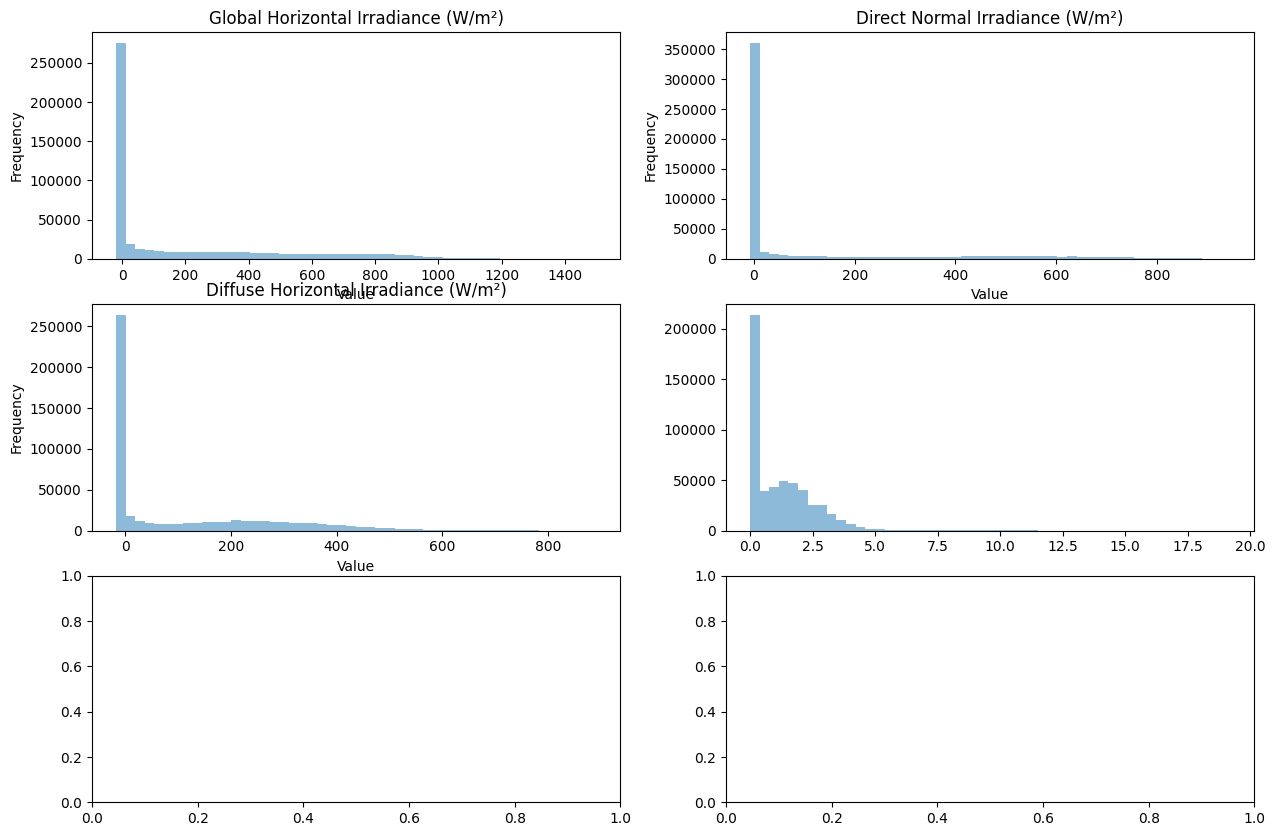

In [13]:
create_histograms(sierraleone_df)

In [14]:
cols = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA']
sierraleone_zdf = calculate_zscores(sierraleone_df, cols)
sierraleone_zdf

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModB,Comments,WD_rad,GHI_zscore,DNI_zscore,DHI_zscore,WS_zscore,Tamb_zscore,TModA_zscore,outlier
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,...,22.6,NaN,0.0,0.678931,0.532700,0.720500,0.924845,1.004726,0.820615,0
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.6,NaN,0.0,0.678931,0.532700,0.720500,0.924845,1.004726,0.820615,0
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.6,NaN,0.0,0.678931,0.532700,0.720500,0.924845,1.004726,0.820615,0
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.6,NaN,0.0,0.678931,0.532243,0.720500,0.924845,1.004726,0.820615,0
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.6,NaN,0.0,0.678931,0.532700,0.720500,0.924845,1.004726,0.820615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,...,24.5,NaN,0.0,0.681946,0.532700,0.733712,0.924845,0.527302,0.667819,0
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,...,24.5,NaN,0.0,0.682281,0.532700,0.734341,0.924845,0.527302,0.667819,0
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,...,24.4,NaN,0.0,0.682281,0.532700,0.734970,0.924845,0.527302,0.675861,0
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,...,24.4,NaN,0.0,0.682281,0.533158,0.736228,0.924845,0.550037,0.675861,0


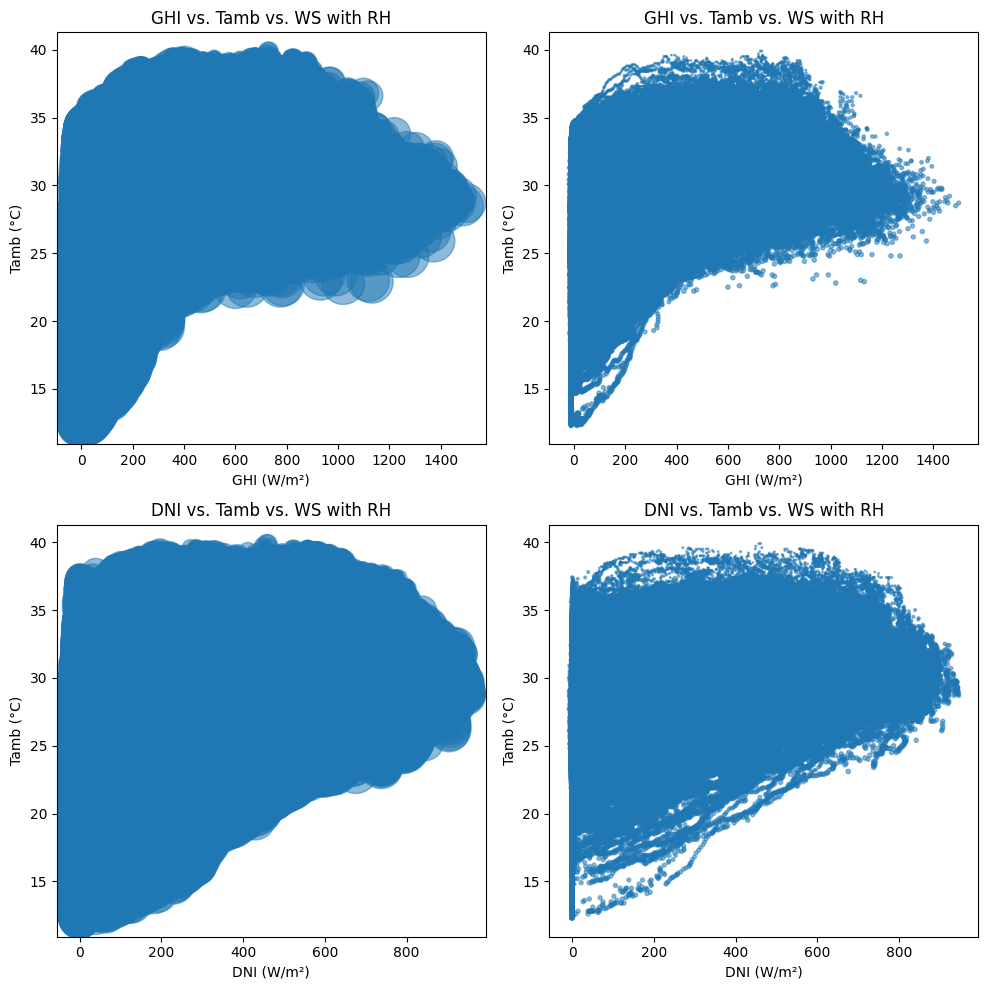

In [15]:
cols = ['GHI', 'DNI', 'Tamb', 'WS']
bubble_col = 'RH'
create_bubble_charts(sierraleone_df, cols, bubble_col)

c:\Users\amanu\OneDrive\Desktop\week_0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


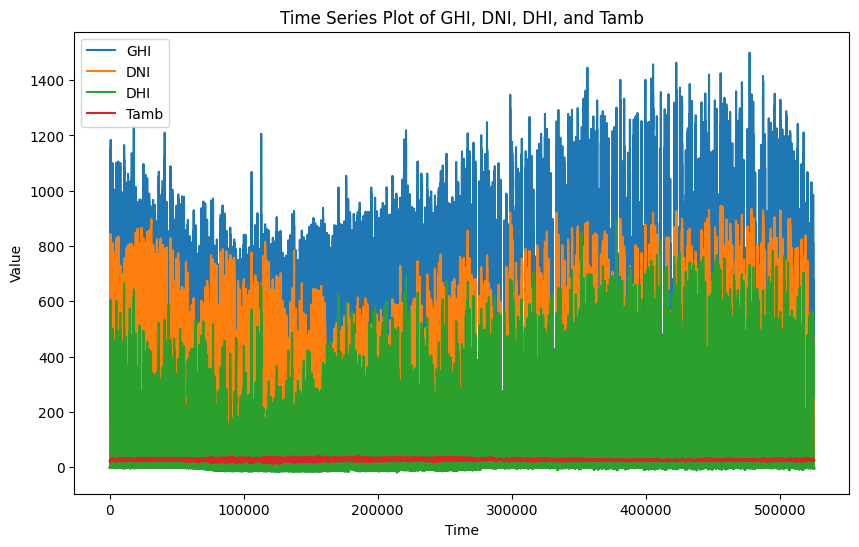

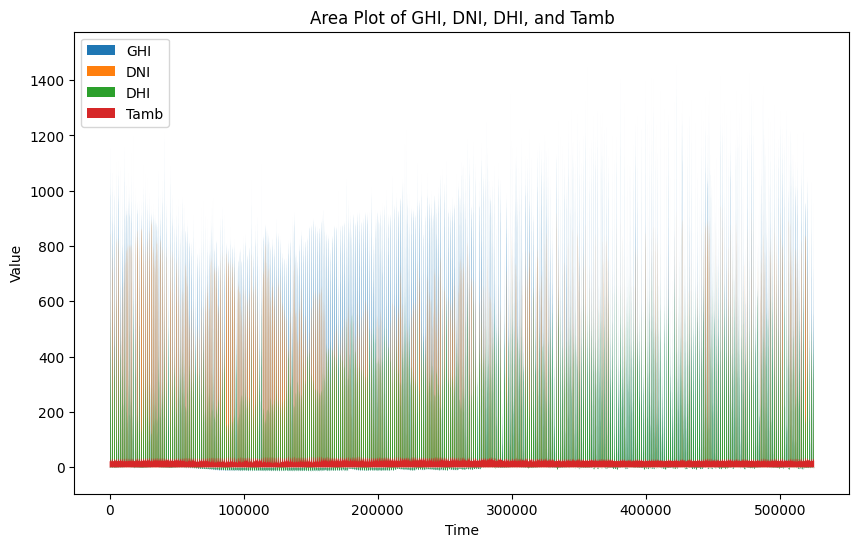

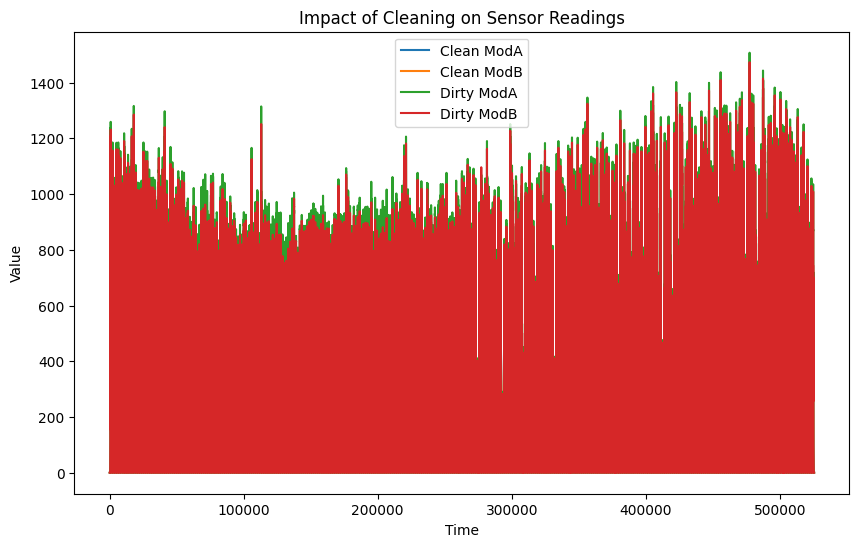

In [16]:
create_time_series_plots(sierraleone_df)

In [17]:
cleaned_sierraleone_df = clean_data(sierraleone_df)

# Print the cleaned togo_df DataFrame
print(cleaned_sierraleone_df)

C:\Users/amanu/OneDrive/Desktop/week_0\scripts\eda_helpers.py:459: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cat_cols] = df[cat_cols].fillna(method='ffill')


               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
5       2021-10-30 00:06 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        ...  TModA  TModB  